# <center>BOOKS DATA PROJECT
    

## Webscrapping data from website

In [ ]:
#Imported required libraries

import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Executed the chrome driver for automated chrome handeling

driver = webdriver.Chrome("chromedriver.exe")

#Opened books website with fiction category on chrome 
print("opening the webpage","\n")

driver.get('https://www.buybooksindia.com/fiction-and-non-fiction-books.php');
time.sleep(2)

#clicked on load more option for loading more books data

print("clicking on load more","\n")

count=0

while True:
    if count==1:
        break
    count+=1
    
    driver.find_element(By.XPATH,"/html/body/div[4]/div/div[3]/div/div/div/div[2]/button").click()
    time.sleep(2)


    
links1=[]

#appended the links in list

link1=driver.find_elements(By.TAG_NAME,"a")
for lnk in link1:
    links1.append(lnk.get_attribute('href'))
    
print("collected all href links","\n")    
#opened books website with kids category

print("opening the new category webpage","\n")

driver.get('https://www.buybooksindia.com/books-detail-view.php/child/commonCat/children-and-young-adult-books');
time.sleep(2)

print("clicking on load more","\n")
##clicked on load more option for loading more books data

count=0

while True:
    if count==1:
        break
    count+=1
    
    driver.find_element(By.XPATH,"/html/body/div[4]/div/div[3]/div/div/div/div[2]/button").click()
    time.sleep(2)

print("collected all href links","\n")
#appended the links in list

link2=driver.find_elements(By.TAG_NAME,"a")
for lnk in link2:
    links1.append(lnk.get_attribute('href'))
    
#created the list of links which contains only book data

book=[]

#appended the book page links in list(book)
print("filtering books webpage link","\n")

for a in links1:
    if a[-4:] == ".htm" and a not in book:
        book.append(a)
        
print("Total book links - ",len(book),"\n")

#created the dictionary for appending the required info

BOOK_DATA={ "book_name":[],
            "author":[],
            "publication":[],
            "publication_year":[],
            "availability":[],
            "pages":[],
            "rating":[],
            "shipping_time" : [],
            "language":[],
            "price":[],
            "binding":[],
            "cover":[],
            "about_book":[],
            "page_link":[]}

#fetched the book imformation and appended the required data
print("started to extract the books data from webpages","\n")


count=0

for i in range(len(book)):
    
    try:
        #appending page link in dictionary 
        
        BOOK_DATA["page_link"].append(book[i])
        driver.get(book[i])
        i=i+1
        
        
        
        driver.implicitly_wait(2)
        
        ## click on product details 
        button = driver.find_element(By.XPATH,"/html/body/div[4]/div/div/div/div/div[2]/ul/li[3]/a")
        driver.execute_script("arguments[0].click();", button)
        
        
        ## scroll down slowly to extract the details
        total_height = int(driver.execute_script("return document.body.scrollHeight"))
        half = int(0.25*(total_height))
        for i in range(1, half , 2):
            driver.execute_script("window.scrollTo(0, {});".format(i))
        
        

        #book name
        try:
            
            book_n= driver.find_element(By.CLASS_NAME,"product-name").text
            BOOK_DATA["book_name"].append(book_n)
        except:
            BOOK_DATA["book_name"].append('Na')
        
        #author name
        try:
            
            auth = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[1]/div[2]/div[1]/div[1]/h3').text
            BOOK_DATA["author"].append(auth)
        except:
            BOOK_DATA["author"].append("Na")
        
        #availability
        try:
            
            avl = driver.find_element(By.CLASS_NAME,'in-stock').text
            BOOK_DATA["availability"].append(avl)
        except:
            BOOK_DATA["availability"].append("Na")
        
        #publication
        try:
            
            pub = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[1]/table/tbody/tr[1]/td[2]/h3').text
            BOOK_DATA["publication"].append(pub)
        except:
            BOOK_DATA["publication"].append("Na")
        
        #published year
        try:
            
            puby = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[1]/table/tbody/tr[2]/td[2]').text
            BOOK_DATA["publication_year"].append(puby)
        except:
            BOOK_DATA["publication_year"].append("Na")
         
        #total pages
        try:
            page = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[1]/table/tbody/tr[6]/td[2]').text
            BOOK_DATA["pages"].append(page)
        except:
            BOOK_DATA["pages"].append("Na")
            
         #book rating   
        try:
            rate = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[1]/div[2]/div[7]/div[1]/p').text
            BOOK_DATA["rating"].append(rate)
        except:
            BOOK_DATA["rating"].append("Na")
            
        #shipping time
        try:
            
            timing = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[1]/div[2]/div[3]/p[2]/span').text
            BOOK_DATA["shipping_time"].append(timing)
        except:
            BOOK_DATA["shipping_time"].append("Na")
        
        #book language
        try:
            
            lang = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[1]/table/tbody/tr[7]/td[2]').text
            BOOK_DATA["language"].append(lang)
        except:
            BOOK_DATA["language"].append("Na")
        
        #book price
        try:
            
            rs = driver.find_element(By.CLASS_NAME,'product-price-group').text
            BOOK_DATA["price"].append(rs)
        except:
            BOOK_DATA["price"].append("Na")
        
        #typeof book binding
        try:
            
            bind = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[1]/table/tbody/tr[5]/td[2]/h4').text
            BOOK_DATA["binding"].append(bind)
        except:
            BOOK_DATA["binding"].append("Na")
         
        #book photo
        try:
            image = driver.find_elements(By.XPATH,'/html/body/div[4]/div/div/div/div/div[1]/div[1]/div/div[1]/div[1]/div/div/div/div/div/img')
            for i in range(1):
                BOOK_DATA["cover"].append(image[i].get_attribute('src'))
                    
        except:
            BOOK_DATA["cover"].append('Na')

        
        button = driver.find_element(By.XPATH,"/html/body/div[4]/div/div/div/div/div[2]/ul/li[1]/a")
        driver.execute_script("arguments[0].click();", button)
        
        try:
            
            about = driver.find_element(By.XPATH,'/html/body/div[4]/div/div/div/div/div[2]/div/div[2]').text
            BOOK_DATA["about_book"].append(about)
        except:
            BOOK_DATA["about_book"].append("Na")
            
        driver.implicitly_wait(2)


        count+=1
        print("book :",count,'|',end=' ')
    except:
        pass
        
print("book data collection done")
        
df = pd.DataFrame(BOOK_DATA)
df.to_csv('mybookstore.csv',index=False)
df

###  # Data Cleaning and preprocessing

In [57]:
col=list(df.columns)
col

['book_name',
 'author',
 'publication',
 'publication_year',
 'availability',
 'pages',
 'rating',
 'shipping_time',
 'language',
 'price',
 'binding',
 'cover',
 'about_book',
 'page_link']

In [58]:
#replaced Na value with nulls

for i in col:
    df[i]=df[i].replace('Na',np.nan)
    
    
#checked for total null values in dataframe 

df.isna().sum()

In [63]:
#dropped rating column  

df.drop(columns='rating',inplace=True)

#replaced the null values in shipping_time with mode value

df['shipping_time'].fillna(df['shipping_time'].mode()[0],inplace=True)

#replaced the null values in binding with mode value

df['binding'].fillna(df['binding'].mode()[0],inplace=True)

#replaced the null values in language with mode value

df['language'].fillna(df['language'].mode()[0],inplace=True)

#deleted noise value rows from language column

df=df.loc[df['language']=='(English)']

#cleaning noise from language column

df['language']=df['language'].str.replace('(','').str.replace(')','')

#deleted noise value rows from pages column

df=df.loc[df['pages']!='(English)']

#cleaning pages column

df['pages']=df['pages'].str.replace('Pages','')

#keeping only relevant price df fromcolumn

df['price']=df['price'].str[:6]

#cleaning the noises from the price column

df['price']=df['price'].str.replace('R','').str.replace('s','')

#cleaning noise from publication year

df=df.loc[df['publication_year'].str.len()==4]

#dropping the duplicate rows

df.drop_duplicates(inplace=True)

#changing the dftype of numeric column

numeric=['publication_year','pages','price']
for i in numeric:
    df[i]=pd.to_numeric(df[i],errors='coerce')
    
#dropped remaining null values rows from dfset 

df.dropna(inplace=True)

#changing datatypefromfloat to int

df['pages']=df['pages'].astype('int64')

#reseting the index of datafram

data.reset_index(drop=True,inplace=True)

len(df)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_2772/2961701942.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['language']=df['language'].str.replace('(','').str.replace(')','')
C:\Users\lenovo\AppData\Local\Temp/ipykernel_2772/2961701942.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language']=df['language'].str.replace('(','').str.replace(')','')


2485

# Building Machine learning models

## 1.clustering model for grouping books in 3 price ranges

In [68]:
#importing kmeans clustering algorithm

from sklearn.cluster import KMeans

#n_cluster value is 3 

kmeans = KMeans(n_clusters=3)

#fittin  kmeans algorithm on columns

kmeans.fit(df[['pages','price']])

#predicting the clusters

cluster = kmeans.predict(df[['pages','price']])

#concatinating the column to dfset

df['cluster']=cluster

#mapping the text to clusters

classes={0:'low range',1:'mid range',2:'high range'}

df['cluster']= df['cluster'].map(classes)

#exporting final preprocessed and clustered dfset

df.to_csv("mybooks_project_data.csv")

## Dataset Analysis

<AxesSubplot:xlabel='cluster', ylabel='count'>

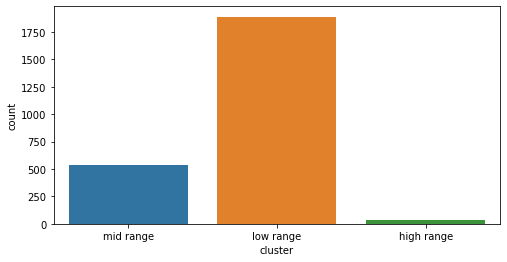

In [115]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['cluster'])

<AxesSubplot:xlabel='publication_year', ylabel='Count'>

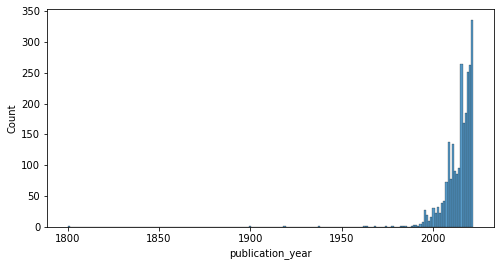

In [116]:
plt.figure(figsize=(8,4))
sns.histplot(x=data['publication_year'])

<AxesSubplot:xlabel='shipping_time', ylabel='Count'>

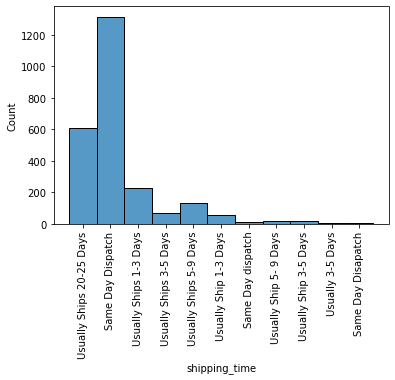

In [119]:
plt.xticks(rotation=90)
sns.histplot(x=data['shipping_time'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

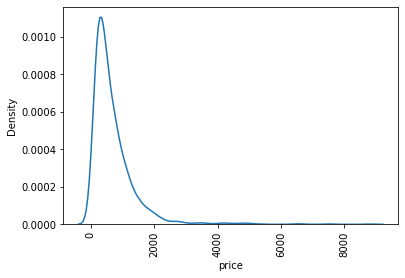

In [126]:
plt.xticks(rotation=90)
sns.distplot(data['price'],hist=False)

## 2.Linear regression model for price prediction

In [86]:
pred_data=pd.read_csv("mybooks_final.csv")

In [87]:
pred_data=pred_data.iloc[:,1:]

In [111]:
pred_data.head(2)

,book_name,author,publication,publication_year,availability,pages,shipping_time,language,price,binding,cover,about_book,web_link,cluster
0,Continuous Discovery Habits: Discover Products...,Teresa Torres,Product Talk LLC,2021,Available,244.0,Usually Ships 20-25 Days,English,1500,Paperback,https://cms.buybooksindia.com/uploads/books/97...,How do you know that you are making a product ...,https://www.buybooksindia.com/-continuous-disc...,mid range
1,TULIP OF ISTANBUL,Iskender Pala,Niyogi Books,2021,Available,392.0,Same Day Dispatch,English,396,Paperback,https://cms.buybooksindia.com/uploads/books/97...,Tulip of Istanbul is a historical novel depi...,https://www.buybooksindia.com/-tulip-of-istanb...,low range


In [89]:
pred_data.nunique()

book_name           2331
author              1624
publication          799
publication_year      47
availability           2
pages                353
shipping_time         11
language               1
price                834
binding                5
cover               2458
about_book          2259
web_link            2458
cluster                3
dtype: int64

In [90]:
pred_data.columns

Index(['book_name', 'author', 'publication', 'publication_year',
       'availability', 'pages', 'shipping_time', 'language', 'price',
       'binding', 'cover', 'about_book', 'web_link', 'cluster'],
      dtype='object')

In [91]:
#keeping only categorical and numerical columns

df_pred=pred_data[['publication', 'publication_year','availability', 'pages','binding','cluster','price']]
df_pred


,publication,publication_year,availability,pages,binding,cluster,price
0,Product Talk LLC,2021,Available,244.0,Paperback,mid range,1500
1,Niyogi Books,2021,Available,392.0,Paperback,low range,396
2,Penguin Random House India Private Limited,2015,Available,390.0,Paperback,low range,315
3,T Gephart,2017,Available,316.0,Paperback,low range,804
4,Kicam Projects,2016,Available,128.0,Paperback,low range,646
...,...,...,...,...,...,...,...
2453,Amar Chitra Katha,2000,Available,32.0,Paperback,low range,162
2454,Amar Chitra Katha,2017,Available,32.0,Paperback,low range,138
2455,Amar Chitra Katha,2018,Available,32.0,Paperback,low range,138
2456,HARPERCOLLINS PUBLISHERS INDIA,2022,Out of Stock,24.0,Paperback,low range,269


In [92]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [93]:
df_pred.dropna(inplace=True)

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [94]:
df_pred[['publication','publication_year']]=enc.fit_transform(df_pred[['publication','publication_year']])

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [95]:
df_pred=pd.get_dummies(df_pred,columns=['availability','binding','cluster'],drop_first=True)

In [96]:
df_pred

,publication,publication_year,pages,price,availability_Out of Stock,binding_Flexibound,binding_Hardcover,binding_Paperback,binding_Spiral Bound,cluster_low range,cluster_mid range
0,530.0,45.0,244.0,1500,0,0,0,1,0,0,1
1,452.0,45.0,392.0,396,0,0,0,1,0,1,0
2,502.0,39.0,390.0,315,0,0,0,1,0,1,0
3,685.0,41.0,316.0,804,0,0,0,1,0,1,0
4,348.0,40.0,128.0,646,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2453,22.0,24.0,32.0,162,0,0,0,1,0,1,0
2454,22.0,41.0,32.0,138,0,0,0,1,0,1,0
2455,22.0,42.0,32.0,138,0,0,0,1,0,1,0
2456,253.0,46.0,24.0,269,1,0,0,1,0,1,0


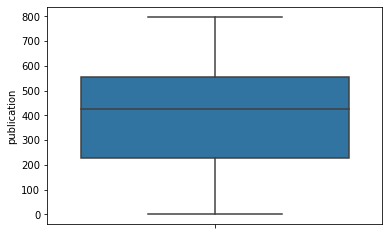

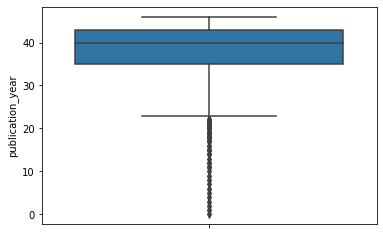

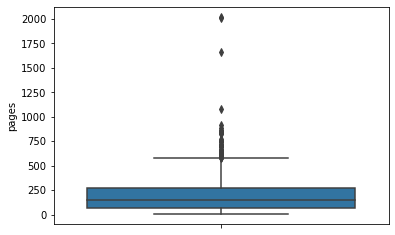

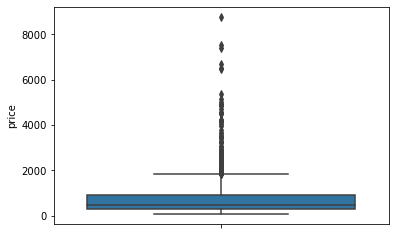

In [97]:
c = ['publication','publication_year','pages','price']

for i in c:
    plt.figure()
    sns.boxplot(y=df_pred[i])
    plt.show()

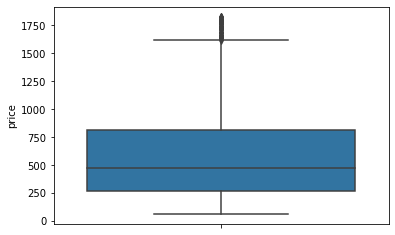

In [98]:
outliers= ['price']

for i in outliers:
    Q1=df_pred[i].quantile(0.25)
    Q3=df_pred[i].quantile(0.75)
    IQR= Q3 - Q1
    LowerLimit = Q1-(IQR * 1.5)
    UpperLimit = Q3+(IQR * 1.5)
    df_pred=df_pred.loc[(df_pred[i]>LowerLimit) & (df_pred[i]<UpperLimit)]
    plt.figure()
    sns.boxplot(y=df_pred[i])
    plt.show()

In [99]:
x=df_pred[['publication', 'publication_year', 'pages',
       'availability_Out of Stock', 'binding_Flexibound', 'binding_Hardcover',
       'binding_Paperback', 'binding_Spiral Bound', 'cluster_low range',
       'cluster_mid range']].values
x

array([[530.,  45., 244., ...,   0.,   0.,   1.],
       [452.,  45., 392., ...,   0.,   1.,   0.],
       [502.,  39., 390., ...,   0.,   1.,   0.],
       ...,
       [ 22.,  42.,  32., ...,   0.,   1.,   0.],
       [253.,  46.,  24., ...,   0.,   1.,   0.],
       [202.,  46., 128., ...,   0.,   1.,   0.]])

In [100]:
y=df_pred['price'].values
y

array([1500,  396,  315, ...,  138,  269,  899], dtype=int64)

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [103]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [104]:
reg.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred=reg.predict(x_test)
y_pred

array([1203.94504596,  439.86334234,  375.26523713,  393.90555254,
        395.45683501,  384.96070313, 1186.44892075,  419.29558091,
        383.28600847,  388.11207996,  425.46129524,  388.58262973,
       1248.71539207,  432.95536766,  427.77658743,  419.87660727,
        437.65448868, 1244.74145225,  529.47861315,  430.81880232,
        420.40728966,  436.84062749,  435.24756137,  420.886627  ,
       1225.80345594,  424.82631668, 1216.02974898,  429.38068587,
        402.80782607,  438.97566234,  441.76299476,  441.85887355,
       1199.05873289,  440.19090122,  418.4613847 ,  421.30334183,
        451.70310831, 1299.87625745, 1225.37562492, 1211.92977594,
       1246.32153706,  410.09005425,  436.89166301,  416.89073429,
       1228.99203704,  433.92723173,  413.78558838,  471.70245662,
        425.68187923, 1223.27338338,  436.43201546, 1244.89521788,
        414.94002523,  441.86029666, 1225.80345594,  425.72549014,
        417.60684161,  461.18419791,  383.58641486,  426.69966

In [106]:
from sklearn import metrics

In [107]:
metrics.r2_score(y_test,y_pred)

0.7014884537339476

In [108]:
metrics.mean_squared_error(y_test,y_pred)

48479.65511326963

In [109]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

220.18095992448946